# Import library

In [1275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Import dataset

In [1276]:
df= pd.read_excel('../tsts_05042022_anonymous.xlsx', 
                  usecols=['thaiphuid', 'd_mom_pappa', 'd_khoangsangsaugay', 'd_mom_nt', 'd_mom_hcgb', 
                           't_mom_ue3', 't_mom_afp', 't_mom_hcg', 'chieudaidaumong',
                           'co_nangbachhuyetvungco', 'dau_duongkinhluongdinh','d_khoangsangsaugay',
                           'Mat_XuongMui', 'co_khoangsangsaugay', 'sieuamkythun', 'dau_chuvidau', 
                           'dau_naothatben' , 'bung_chuvivongbung', 'chi_chieudaixuongdui' , 'nguc_ditattim', 
                           'mat_xuongsongmui', 'ngaysinh', 'tuoithai' ,'ngaydangkykham', 'cannang','dukiensinh',
                           'ngaydautienchukykinhcuoi','d_ngaythuchien','t_ngaythuchien', 'ngaythuchien_thainhi',
                           'nguc_nhiptimthai', 'pcr_trisomy21', 'bobs_trisomy21', 'karyotype_trisomy21'])

In [1277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13659 entries, 0 to 13658
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   thaiphuid                 13659 non-null  object        
 1   ngaysinh                  13649 non-null  datetime64[ns]
 2   cannang                   11727 non-null  float64       
 3   ngaydautienchukykinhcuoi  4108 non-null   datetime64[ns]
 4   ngaydangkykham            12922 non-null  datetime64[ns]
 5   d_ngaythuchien            5892 non-null   datetime64[ns]
 6   d_mom_hcgb                6064 non-null   float64       
 7   d_mom_pappa               6057 non-null   float64       
 8   d_khoangsangsaugay        5907 non-null   float64       
 9   d_mom_nt                  5016 non-null   float64       
 10  t_ngaythuchien            3341 non-null   datetime64[ns]
 11  t_mom_ue3                 3672 non-null   float64       
 12  t_mom_afp         

In [1278]:
for i in df.columns:
    miss= df[i].isnull().sum()
    cout= miss/df.shape[0]*100
    print(">%s miss %d (%.3f%%)"%(i,miss,cout))

>thaiphuid miss 0 (0.000%)
>ngaysinh miss 10 (0.073%)
>cannang miss 1932 (14.145%)
>ngaydautienchukykinhcuoi miss 9551 (69.925%)
>ngaydangkykham miss 737 (5.396%)
>d_ngaythuchien miss 7767 (56.864%)
>d_mom_hcgb miss 7595 (55.604%)
>d_mom_pappa miss 7602 (55.656%)
>d_khoangsangsaugay miss 7752 (56.754%)
>d_mom_nt miss 8643 (63.277%)
>t_ngaythuchien miss 10318 (75.540%)
>t_mom_ue3 miss 9987 (73.117%)
>t_mom_afp miss 9989 (73.131%)
>t_mom_hcg miss 9989 (73.131%)
>sieuamkythun miss 2293 (16.787%)
>ngaythuchien_thainhi miss 2307 (16.890%)
>dukiensinh miss 3357 (24.577%)
>tuoithai miss 5128 (37.543%)
>chieudaidaumong miss 9540 (69.844%)
>dau_duongkinhluongdinh miss 2414 (17.673%)
>dau_chuvidau miss 2875 (21.048%)
>dau_naothatben miss 6210 (45.465%)
>Mat_XuongMui miss 2461 (18.017%)
>mat_xuongsongmui miss 6139 (44.945%)
>co_nangbachhuyetvungco miss 2991 (21.898%)
>co_khoangsangsaugay miss 9486 (69.449%)
>nguc_nhiptimthai miss 2447 (17.915%)
>nguc_ditattim miss 2991 (21.898%)
>bung_chuvivongbu

In [1279]:
df.shape

(13659, 33)

<Figure size 1000x600 with 0 Axes>

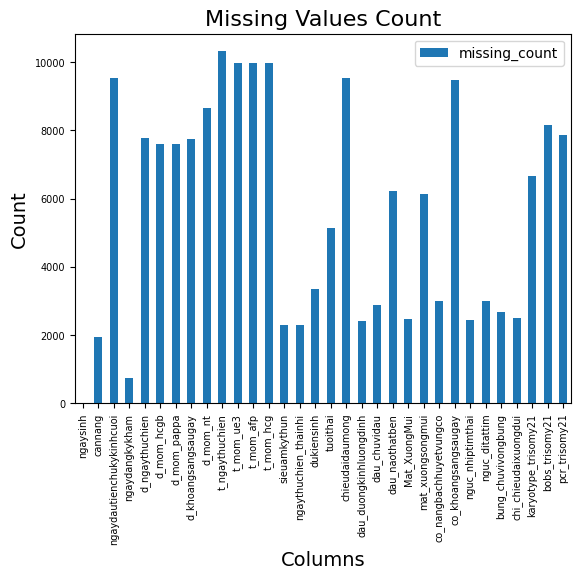

In [1280]:
# Visualize missing data
plt.figure(figsize=(10, 6))

df_missing = df.isna().sum().reset_index()
df_missing.columns = ['feature', 'missing_count'] # Rename columns
df_missing = df_missing.loc[df_missing['missing_count'] > 0]
df_missing.plot.bar(x='feature', y='missing_count')

plt.title('Missing Values Count', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(axis='x', which='major', labelsize=7)
plt.tick_params(axis='y', which='major', labelsize=7)
plt.show()

In [1281]:
df.dropna(how='all',inplace= True)
df.drop_duplicates(inplace= True)

In [1282]:
df.shape

(13654, 33)

In [1283]:
df = df[(~df['pcr_trisomy21'].isnull())|(~df['karyotype_trisomy21'].isnull())|(~df['bobs_trisomy21'].isnull())]

# Labeling Trisomy 21

In [1284]:
for i in df.index:
  if df.loc[i,'pcr_trisomy21'] == 1:
      df.loc[i,'benh21'] = df.loc[i, 'pcr_trisomy21']
  else:
    if(df.loc[i, 'bobs_trisomy21']) == 1:
      df.loc[i,'benh21'] = df.loc[i, 'bobs_trisomy21']
    else:
      if df.loc[i, 'karyotype_trisomy21'] == 1:
        df.loc[i,'benh21'] = df.loc[i, 'karyotype_trisomy21']
      else:
        df.loc[i,'benh21'] = 0

# 0: Bình thường
# 1: Bị bệnh

In [1285]:
df = df.drop(['karyotype_trisomy21', 'bobs_trisomy21', 'pcr_trisomy21'], axis= 1)

col= [ 'cannang', 'tuoithai', 'd_mom_hcgb', 'd_mom_pappa',
       'd_khoangsangsaugay','d_khoangsangsaugay','d_mom_nt', 
       't_mom_ue3', 't_mom_afp', 't_mom_hcg',  
       'chieudaidaumong', 'dau_duongkinhluongdinh','bung_chuvivongbung', 
       'chi_chieudaixuongdui','dau_naothatben', 'dau_chuvidau', 'co_khoangsangsaugay', 
       'mat_xuongsongmui','nguc_nhiptimthai']

# Thay thế giá trị 0 hoặc NaT bằng NaN
for i in df.index:
  for j in col:
    if df.loc[i,j] == 0 or str(df.loc[i,j]) == "NaT":
      df.loc[i,j]= np.NaN


In [1287]:
for j in df.columns:
    miss = df[j].isnull().sum()
    cout = miss/df.shape[0]*100
    print("%s miss %d: %.3f %%"%(j,miss,cout))

thaiphuid miss 0: 0.000 %
ngaysinh miss 5: 0.071 %
cannang miss 5066: 71.960 %
ngaydautienchukykinhcuoi miss 4229: 60.071 %
ngaydangkykham miss 625: 8.878 %
d_ngaythuchien miss 4223: 59.986 %
d_mom_hcgb miss 4320: 61.364 %
d_mom_pappa miss 4327: 61.463 %
d_khoangsangsaugay miss 4511: 64.077 %
d_mom_nt miss 5465: 77.628 %
t_ngaythuchien miss 5016: 71.250 %
t_mom_ue3 miss 5063: 71.918 %
t_mom_afp miss 5059: 71.861 %
t_mom_hcg miss 5064: 71.932 %
sieuamkythun miss 11: 0.156 %
ngaythuchien_thainhi miss 25: 0.355 %
dukiensinh miss 929: 13.196 %
tuoithai miss 2420: 34.375 %
chieudaidaumong miss 5226: 74.233 %
dau_duongkinhluongdinh miss 151: 2.145 %
dau_chuvidau miss 661: 9.389 %
dau_naothatben miss 3169: 45.014 %
Mat_XuongMui miss 12: 0.170 %
mat_xuongsongmui miss 3121: 44.332 %
co_nangbachhuyetvungco miss 548: 7.784 %
co_khoangsangsaugay miss 5166: 73.381 %
nguc_nhiptimthai miss 186: 2.642 %
nguc_ditattim miss 548: 7.784 %
bung_chuvivongbung miss 452: 6.420 %
chi_chieudaixuongdui miss 234:

# Process features

## Tính toán tuổi mẹ (tuoime)

In [1289]:
# tuoime1 = Ngày đăng kí khám - Ngày sinh của mẹ
for i in df.index:
  df.loc[i, 'tuoime1'] = (df.loc[i,'ngaydangkykham'] - df.loc[i, 'ngaysinh']).total_seconds()/(365*24*60*60)

In [1290]:
# tuoime2 = Ngày thực hiện siêu âm - Ngày sinh của mẹ
for i in df.index:
  df.loc[i, 'tuoime2'] = (df.loc[i,'ngaythuchien_thainhi'] - df.loc[i, 'ngaysinh']).total_seconds()/(365*24*60*60)

In [1291]:
# tuoime3 = Ngày thực hiện double test - Ngày sinh của mẹ
for i in df.index:
  df.loc[i, 'tuoime3'] = (df.loc[i,'d_ngaythuchien'] - df.loc[i, 'ngaysinh']).total_seconds()/(365*24*60*60)

In [1292]:
# tuoime4 = Ngày thực hiện triple test - Ngày sinh của mẹ
for i in df.index:
  df.loc[i, 'tuoime4'] = (df.loc[i,'t_ngaythuchien'] - df.loc[i, 'ngaysinh']).total_seconds()/(365*24*60*60)

In [1293]:
for i in df.index:
  if np.isnan(df.loc[i, 'tuoime1']) != True and df.loc[i, "tuoime1"] > 17:
     df.loc[i, 'tuoime'] = df.loc[i, 'tuoime1'] 
  else:
    if np.isnan(df.loc[i, 'tuoime2']) != True and df.loc[i, "tuoime2"] > 17:
        df.loc[i, 'tuoime'] = df.loc[i, 'tuoime2']  
    else: 
      if np.isnan(df.loc[i, 'tuoime3']) != True and df.loc[i, "tuoime3"]>17:
        df.loc[i, 'tuoime'] = df.loc[i, 'tuoime3']  
      else:
        if np.isnan(df.loc[i, 'tuoime4']) != True and df.loc[i, "tuoime4"]>17:
          df.loc[i, 'tuoime'] = df.loc[i, 'tuoime4']  
        else:
          df.loc[i, 'tuoime'] = np.NaN

df['tuoime'] = round(df['tuoime'])

df.drop(['tuoime1', 'tuoime2', 'tuoime3', 'tuoime4'], axis=1, inplace=True)
df.drop(['ngaysinh', 'ngaydangkykham', 'd_ngaythuchien', 't_ngaythuchien'], axis=1, inplace=True)

In [1294]:
df.columns

Index(['thaiphuid', 'cannang', 'ngaydautienchukykinhcuoi', 'd_mom_hcgb',
       'd_mom_pappa', 'd_khoangsangsaugay', 'd_mom_nt', 't_mom_ue3',
       't_mom_afp', 't_mom_hcg', 'sieuamkythun', 'ngaythuchien_thainhi',
       'dukiensinh', 'tuoithai', 'chieudaidaumong', 'dau_duongkinhluongdinh',
       'dau_chuvidau', 'dau_naothatben', 'Mat_XuongMui', 'mat_xuongsongmui',
       'co_nangbachhuyetvungco', 'co_khoangsangsaugay', 'nguc_nhiptimthai',
       'nguc_ditattim', 'bung_chuvivongbung', 'chi_chieudaixuongdui', 'benh21',
       'tuoime'],
      dtype='object')

## Tính toán tuổi thai nhi (tuoithainhi)

In [1295]:
# tuoithai1 = 40 tuần - (Ngày dự kiến sinh - Ngày thực hiện siêu âm)
for i in df.index:
  df.loc[i, 'tuoithai1'] = 40*7 - (df.loc[i, 'dukiensinh'] - df.loc[i, 'ngaythuchien_thainhi']).total_seconds()/(24*60*60)

In [1296]:
# tuoithai2 = Ngày thực hiện siêu âm - Ngày chu kỳ kinh cuối
for i in df.index:
  df.loc[i, 'tuoithai2'] = (df.loc[i, 'ngaythuchien_thainhi'] - df.loc[i, 'ngaydautienchukykinhcuoi']).total_seconds()/(24*60*60)

In [1297]:
# tuoithai3
dict_cddm= {10: 52, 11: 53, 12: 54, 13: 56, 14: 57, 15: 58, 16: 59, 17: 60,18: 61, 19: 62, 
            20: 63, 21: 64, 22: 65, 23: 66, 24: 67, 25: 68, 26: 69, 27: 70, 28: 71, 29: 72,
            30: 72, 31: 73, 32: 74, 33: 75, 34: 76, 35: 76, 36: 77, 37: 78, 38: 79, 39: 79, 
            40: 80, 41: 81, 42: 81, 43: 82, 44: 83, 45: 83, 46: 84, 47: 85, 48: 85, 49: 86}
for i in df.index:
  try:
    df.loc[i, 'tuoithai3'] = dict_cddm[df.loc[i, 'chieudaidaumong']]
  except:
    df.loc[i, 'tuoithai3'] = np.NaN
# ánh xạ từ dict_cddm vào df dựa trên cột 'chieudaidaumong'


In [1298]:
# tuoithai4 = 10.5992189734−0.1682642749×BPD+0.0451977088×HC+0.0302344331×AC+0.0575622626×FL+0.002497813×BPD^2+0.0017031489×FL^2+0.0005458077×(BPD×AC)−0.0051546864×(BPD×FL)−0.000276112×(HC×AC)+0.0007657091×(HC×FL)+0.0005523225×(AC×FL)
# BPD: đường kính lưỡng đỉnh
# AC: chu vi bụng
# HC: vòng đầu
# FL: chiều dài xương đùi

for i in df.index:
  try:
    df.loc[i, 'tuoithai4'] = 10.5992189734 - 0.1682642749*df.loc[i, 'dau_duongkinhluongdinh'] + 0.0451977088*df.loc[i, 'dau_chuvidau'] + 0.0302344331*df.loc[i, 'bung_chuvivongbung'] + 0.0575622626*df.loc[i, 'chi_chieudaixuongdui'] + 0.002497813*df.loc[i, 'dau_duongkinhluongdinh']**2 + 0.0017031489*df.loc[i, 'chi_chieudaixuongdui']**2 + 0.0005458077*df.loc[i, 'dau_duongkinhluongdinh']*df.loc[i, 'bung_chuvivongbung'] - 0.0051546864*df.loc[i, 'dau_duongkinhluongdinh']*df.loc[i, 'chi_chieudaixuongdui'] - 0.000276112*df.loc[i, 'dau_chuvidau']*df.loc[i, 'bung_chuvivongbung'] + 0.0007657091*df.loc[i, 'dau_chuvidau']*df.loc[i, 'chi_chieudaixuongdui'] + 0.0005523225*df.loc[i, 'bung_chuvivongbung']*df.loc[i, 'chi_chieudaixuongdui']
  except:
    df.loc[i, 'tuoithai4'] = np.NaN

df['tuoithai4'] = df['tuoithai4']* 7

In [1299]:
dict_quy= {1:[70,97], 2:[98,167], 3:[168,195], 4:[196,280]}

for i in df.index:
  if np.isnan(df.loc[i, 'tuoithai']) != True and df.loc[i, 'tuoithai'] <= dict_quy[df.loc[i, 'sieuamkythun']][1] and df.loc[i, 'tuoithai'] >= dict_quy[df.loc[i, 'sieuamkythun']][0] :
    df.loc[i, 'tuoithainhi'] = df.loc[i, 'tuoithai']
  else:
    if np.isnan(df.loc[i, 'tuoithai1']) !=True and df.loc[i, 'tuoithai1'] <= dict_quy[df.loc[i, 'sieuamkythun']][1] and df.loc[i, 'tuoithai1'] >= dict_quy[df.loc[i, 'sieuamkythun']][0]:
      df.loc[i, 'tuoithainhi'] = df.loc[i, 'tuoithai1']
    else:
      if np.isnan(df.loc[i, 'tuoithai3']) !=True and df.loc[i, 'tuoithai3'] <= dict_quy[df.loc[i, 'sieuamkythun']][1] and df.loc[i, 'tuoithai3'] >= dict_quy[df.loc[i, 'sieuamkythun']][0]:
        df.loc[i, 'tuoithainhi'] = df.loc[i, 'tuoithai3']
      else:
        if np.isnan(df.loc[i, 'tuoithai2']) !=True and df.loc[i, 'tuoithai2'] <= dict_quy[df.loc[i, 'sieuamkythun']][1] and df.loc[i, 'tuoithai2'] >= dict_quy[df.loc[i, 'sieuamkythun']][0]:
          df.loc[i, 'tuoithainhi'] = df.loc[i, 'tuoithai2']
        else:
          if np.isnan(df.loc[i, 'tuoithai4']) !=True and df.loc[i, 'tuoithai4'] <= dict_quy[df.loc[i, 'sieuamkythun']][1] and df.loc[i, 'tuoithai4'] >= dict_quy[df.loc[i, 'sieuamkythun']][0]:
            df.loc[i, 'tuoithainhi'] = df.loc[i, 'tuoithai4']
          else:
            df.loc[i, 'tuoithainhi'] = np.NaN

df['tuoithainhi']= round(df['tuoithainhi'])

df.drop(['tuoithai', 'tuoithai1', 'tuoithai2', 'tuoithai3', 'tuoithai4'], axis=1, inplace=True)
df.drop(['ngaydautienchukykinhcuoi', 'ngaythuchien_thainhi', 'dukiensinh'], axis=1, inplace=True)

In [1300]:
df.columns

Index(['thaiphuid', 'cannang', 'd_mom_hcgb', 'd_mom_pappa',
       'd_khoangsangsaugay', 'd_mom_nt', 't_mom_ue3', 't_mom_afp', 't_mom_hcg',
       'sieuamkythun', 'chieudaidaumong', 'dau_duongkinhluongdinh',
       'dau_chuvidau', 'dau_naothatben', 'Mat_XuongMui', 'mat_xuongsongmui',
       'co_nangbachhuyetvungco', 'co_khoangsangsaugay', 'nguc_nhiptimthai',
       'nguc_ditattim', 'bung_chuvivongbung', 'chi_chieudaixuongdui', 'benh21',
       'tuoime', 'tuoithainhi'],
      dtype='object')

## khoangsangsaugay

In [1301]:
for i in df.index:
  if df.loc[i, 'co_khoangsangsaugay'] >6 and df.loc[i, 'benh21'] == 2:
    df.loc[i, 'co_khoangsangsaugay'] = np.NaN

In [1302]:
for i in df.index:
  if df.loc[i, 'd_khoangsangsaugay'] > 6 or df.loc[i, 'd_khoangsangsaugay'] < 0:
    df.loc[i, 'd_khoangsangsaugay']= np.NaN

In [1303]:
df.describe()

,cannang,d_mom_hcgb,d_mom_pappa,d_khoangsangsaugay,d_mom_nt,t_mom_ue3,t_mom_afp,t_mom_hcg,sieuamkythun,chieudaidaumong,...,mat_xuongsongmui,co_nangbachhuyetvungco,co_khoangsangsaugay,nguc_nhiptimthai,nguc_ditattim,bung_chuvivongbung,chi_chieudaixuongdui,benh21,tuoime,tuoithainhi
count,1.974000e+03,2720.000000,2713.000000,2515.000000,1575.000000,1977.000000,1981.000000,1976.000000,7029.000000,1814.000000,...,3919.000000,6492.000000,1874.000000,6854.000000,6492.000000,6588.000000,6806.000000,7040.000000,6993.000000,6955.000000
mean,2.544177e+06,3.215430,13.790296,1.786529,21.292638,29.237217,47.792553,51.444202,1.781192,63.180094,...,5.266440,1.993685,2.909685,153.933761,1.950709,111.752125,20.320599,0.156108,31.748034,117.210784
std,1.130347e+08,44.437838,282.500436,0.870509,485.171604,512.587768,1789.789335,966.489196,0.551228,16.030848,...,3.418055,0.079225,1.804573,19.281914,0.216493,42.418713,10.995320,0.362983,6.162140,25.077972
min,3.800000e+01,0.060000,0.000800,0.200000,-48.000000,0.051600,0.171100,0.060000,1.000000,6.000000,...,0.450000,1.000000,0.500000,45.000000,1.000000,6.000000,1.000000,0.000000,17.000000,70.000000
25%,4.800000e+01,0.956750,0.388000,1.200000,0.900000,0.561500,0.640000,1.010000,1.000000,57.000000,...,4.000000,2.000000,1.600000,148.000000,2.000000,77.000000,11.000000,0.000000,27.000000,95.000000
50%,5.100000e+01,1.588000,0.630000,1.500000,1.150000,0.740000,0.829000,1.517700,2.000000,63.000000,...,4.900000,2.000000,3.000000,154.000000,2.000000,109.000000,20.000000,0.000000,31.000000,115.000000
75%,5.600000e+01,2.810000,1.000000,2.155000,1.820000,0.990000,1.060200,2.186125,2.000000,69.000000,...,6.000000,2.000000,3.700000,160.000000,2.000000,131.000000,26.000000,0.000000,37.000000,128.000000
max,5.022102e+09,2152.000000,7086.000000,6.000000,15873.000000,10208.000000,78352.000000,26721.000000,4.000000,641.000000,...,101.000000,2.000000,47.000000,1488.000000,2.000000,354.000000,157.000000,1.000000,55.000000,255.000000


## cannang

In [1304]:
# Bỏ qua cân nặng
df.drop('cannang', axis =1, inplace= True) 

## Chieu dai xuong mui

In [1305]:
for i in df.index:
  if df.loc[i, 'mat_xuongsongmui'] > 10:
    df.loc[i, 'mat_xuongsongmui'] = np.NaN

## chieudaidaumong

In [1306]:
s1 = [0, 1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100]
s2 = []

# tính phân vị cột
for i in s1:
  s2.append(np.percentile(df['chieudaidaumong'].dropna().values, i))
for i in df.index:
  if df.loc[i, 'chieudaidaumong'] < 23 or df.loc[i, 'chieudaidaumong'] > 93: # giá trị ngoại lai
    df.loc[i, 'chieudaidaumong'] = np.NaN

## dau_duongkinhluongdinh

In [1307]:
s1 = [0, 1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100]
s2 = []

# tính phân vị cột
for i in s1:
  s2.append(np.percentile(df['dau_duongkinhluongdinh'].dropna().values, i))
for i in df.index:
  if df.loc[i, 'dau_duongkinhluongdinh'] < 10 or df.loc[i, 'dau_duongkinhluongdinh'] > 99: # giá trị ngoại lai
    df.loc[i, 'dau_duongkinhluongdinh']= np.NaN

## dau_chuvidau

In [1308]:
s1 = [0, 1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100]
s2 = []

# tính phân vị cột
for i in s1:
  s2.append(np.percentile(df['dau_chuvidau'].dropna().values, i))
s2
for i in df.index:
  if df.loc[i, 'dau_chuvidau'] < 50 or df.loc[i, 'dau_chuvidau'] > 320: # giá trị ngoại lai
    df.loc[i, 'dau_chuvidau'] = np.NaN

## chi_chieudaixuongdui

In [1309]:
s1 = [0, 1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100]
s2 = []

# tính phân vị cột
for i in s1:
  s2.append(np.percentile(df['chi_chieudaixuongdui'].dropna().values, i))
s2
for i in df.index:
  if df.loc[i, 'chi_chieudaixuongdui'] < 4 or df.loc[i, 'chi_chieudaixuongdui'] > 84: # giá trị ngoại lai
    df.loc[i, 'chi_chieudaixuongdui'] = np.NaN

## dau_naothatben

In [1310]:
for i in df.index:
  if df.loc[i, 'dau_naothatben'] > 40 or df.loc[i, 'dau_naothatben'] < 0: # giá trị ngoại lai
    df.loc[i, 'dau_naothatben'] = np.NaN

## bung_chuvivongbung

In [1311]:
s1 = [0, 1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100]
s2 = []

# tính phân vị cột
for i in s1:
  s2.append(np.percentile(df['bung_chuvivongbung'].dropna().values, i))

for i in df.index:
  if df.loc[i, 'bung_chuvivongbung'] < 35 or df.loc[i, 'bung_chuvivongbung'] > 392: # giá trị ngoại lai
    df.loc[i, 'bung_chuvivongbung'] = np.NaN

## nguc_nhiptimthai

In [1312]:
s1 = [0, 1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100]
s2 = []

# tính phân vị cột
for i in s1:
  s2.append(np.percentile(df['nguc_nhiptimthai'].dropna().values, i))
for i in df.index:
  if df.loc[i, 'nguc_nhiptimthai'] < 110 or df.loc[i, 'nguc_nhiptimthai'] > 190: # giá trị ngoại lai
    df.loc[i, 'nguc_nhiptimthai'] = np.NaN

## Double Test

### d_mom_pappa

In [1313]:
s1 = [0, 1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100 ]
s2 = []

# tính phân vị cột
for i in s1:
  s2.append(np.percentile(df['d_mom_pappa'].dropna().values, i))

In [1314]:
dff = df.copy()

In [1315]:
# Xác định giá trị ngoại lai dựa trên phân vị 1% và 99%
for i in dff.index:
  if dff.loc[i, 'd_mom_pappa'] < np.percentile(df['d_mom_pappa'].dropna().values, 1) or dff.loc[i, 'd_mom_pappa'] > np.percentile(df['d_mom_pappa'].dropna().values, 99):
    dff.loc[i, 'd_mom_pappa'] = np.NaN

### d_mom_hcgb

In [1316]:
s1 = [0,1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100]
s2 = []
for i in s1:
  s2.append(np.percentile(df['d_mom_hcgb'].dropna().values, i))

In [1317]:
for i in dff.index:
  if dff.loc[i, 'd_mom_hcgb'] > np.percentile(df['d_mom_hcgb'].dropna().values, 99): 
    dff.loc[i, 'd_mom_hcgb'] = np.NaN

### d_mom_nt

In [1318]:
s1 = [0, 1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100]
s2 = []
for i in s1:
  s2.append(np.percentile(df['d_mom_nt'].dropna().values, i))

In [1319]:
for i in dff.index:
  if dff.loc[i, 'd_mom_nt'] < np.percentile(df['d_mom_nt'].dropna().values, 1) or dff.loc[i, 'd_mom_nt'] > np.percentile(df['d_mom_nt'].dropna().values, 99):
    dff.loc[i, "d_mom_nt"] = np.NaN

### d_khoangsangsaugay

In [1320]:
s1 = [0, 1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100]
s2 = []
for i in s1:
  s2.append(np.percentile(df['d_khoangsangsaugay'].dropna().values, i))

## Triple Test

### t_mom_ue3

In [1321]:
s1 = [0, 1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100]
s2 = []
for i in s1:
  s2.append(np.percentile(df['t_mom_ue3'].dropna().values, i))

In [1322]:
for i in dff.index:
  if dff.loc[i, 't_mom_ue3'] > np.percentile(df['t_mom_ue3'].dropna().values, 99):
    dff.loc[i, 't_mom_ue3']= np.NaN

### t_mom_hcgb

In [1323]:
s1 = [0, 1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100]
s2 = []
for i in s1:
  s2.append(np.percentile(df['t_mom_hcg'].dropna().values, i))

In [1324]:
for i in dff.index:
  if  dff.loc[i, 't_mom_hcg'] > np.percentile(df['t_mom_hcg'].dropna().values, 98): 
    dff.loc[i, 't_mom_hcg']= np.NaN

### t_mom_afp

In [1325]:
s1 = [0, 1, 2, 3, 4, 5, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 95, 96, 97, 98, 99, 100 ]
s2 = []
for i in s1:
  s2.append(np.percentile(df['t_mom_afp'].dropna().values, i))

In [1326]:
for i in dff.index:
  if dff.loc[i, 't_mom_afp'] > np.percentile(df['t_mom_afp'].dropna().values, 97): 
    dff.loc[i, 't_mom_afp']= np.NaN

## Siêu âm

In [1327]:
mn = dff.groupby('thaiphuid').apply(lambda sf : pd.Series([list(sf.index)])) # nhóm theo thaiphuid
mn = pd.DataFrame(mn)
mn.rename(columns={0:'index'}, inplace= True)

In [1328]:
mn.loc[mn.index.isin({'1900114448'})]

,index
thaiphuid,
1900114448,"[4471, 4472]"


In [1329]:
for i in mn.index:
    mn.loc[i, 'len']= len(mn.loc[i, 'index'])

# thêm cột len
# Tính số lượng phần tử của danh sách chỉ số 'index' tại hàng đó

In [1330]:
for i in mn['index']:
  k = []
  m = 0
  for j in i:
    if np.isnan(dff.loc[j, 'nguc_ditattim']) != True: # check nguc_ditattim có NaN
      k.append(dff.loc[j, 'nguc_ditattim']) # Nếu không NaN -> thêm vào list k
  if len(k) >= 1:
    k = np.array(k).astype(int) # convert numpy array, chuyển kiểu ngyên
    cnt = np.bincount(k)  # đếm số lần xuất hiện của mỗi giá trị trong k.
    h = np.argmax(cnt) # giá trị có số lần xuất hiện nhiều nhất 
  for j in i:
    dff.loc[j, 'nguc_ditattim'] = h 

In [1331]:
for i in mn['index']:
  k = []
  m = 0
  for j in i:
    if np.isnan(dff.loc[j, 'co_nangbachhuyetvungco']) != True:
      k.append(dff.loc[j, 'co_nangbachhuyetvungco'])
  if len(k) >= 1:
    k = np.array(k).astype(int)
    cnt = np.bincount(k)  
    h = np.argmax(cnt)
  for j in i:
    dff.loc[j, 'co_nangbachhuyetvungco'] = h

In [1332]:
for i in mn['index']:
  k = []
  m = 0
  for j in i:
    if np.isnan(dff.loc[j, 'Mat_XuongMui']) != True:
      k.append(dff.loc[j, 'Mat_XuongMui'])
  if len(k) >= 1:
    k = np.array(k).astype(int)
    cnt = np.bincount(k)  
    h = np.argmax(cnt)
  for j in i:
    dff.loc[j, 'Mat_XuongMui'] = h

## Xét nghiệm

In [1333]:
col = ['t_mom_ue3', 't_mom_afp', 't_mom_hcg', 'mat_xuongsongmui', 'dau_naothatben']
col1 = ['d_mom_hcgb', 'd_mom_pappa', 'd_mom_nt', 'd_khoangsangsaugay', 'co_khoangsangsaugay', 'chieudaidaumong']
s = []
s1 = []

for i in dff.index:
    for j in col1:
        if str(dff.loc[i, j]) != 'nan':
            s.append(i)
            break
dff_1 = dff.loc[s] # quý 1

for i in dff.index:
    for j in col:
        if str(dff.loc[i, j])!='nan':
            s1.append(i)
            break
dff_2= dff.loc[s1] # quý 2

In [1334]:
# quý 1 từ 11 tuần- 13t 6d
# xương sống mũi chỉ đánh giá được có hay không : mat_xuongmui
# những thằng ko có xương mũi thì điền = 0
# quý 2 từ 14 tuần - 23t 6d: 

for i in dff_1.index:
    if(dff_1.loc[i, 'sieuamkythun'] != 1):
        dff_1.loc[i, 'co_khoangsangsaugay'] = np.NaN
    if(dff_1.loc[i, 'tuoithainhi']) > 13*7+6: 
        dff_1.loc[i, 'tuoithainhi'] = np.NaN
for i in dff_2.index:
    if(dff_2.loc[i, 'sieuamkythun'] != 2):
        dff_2.loc[i, 'mat_xuongsongmui'] = np.NaN
    if(dff_2.loc[i, 'tuoithainhi']) <= 13*7+6 or (dff_2.loc[i, 'tuoithainhi']) > 23*7+6: 
        dff_2.loc[i, 'tuoithainhi'] = np.NaN


In [1335]:
dff_k1 = dff_1.drop(['sieuamkythun', 'mat_xuongsongmui', 't_mom_ue3', 't_mom_afp', 't_mom_hcg', 'dau_naothatben'], axis= 1)\
                .merge(dff_2.drop(['tuoime', 'sieuamkythun', 'co_khoangsangsaugay', 'd_mom_hcgb', 'd_mom_pappa', 'd_mom_nt', 'd_khoangsangsaugay', 'co_nangbachhuyetvungco', 'Mat_XuongMui', 'nguc_ditattim', 'chieudaidaumong'], axis= 1), on= 'thaiphuid')\
                    .reset_index().drop('index', axis=1)

In [1336]:
dff_k1.isnull().sum()/dff_k1.shape[0]

thaiphuid                   0.000000
d_mom_hcgb                  0.177246
d_mom_pappa                 0.186427
d_khoangsangsaugay          0.235928
d_mom_nt                    0.540120
chieudaidaumong             0.730938
dau_duongkinhluongdinh_x    0.039920
dau_chuvidau_x              0.090220
Mat_XuongMui                0.000000
co_nangbachhuyetvungco      0.000000
co_khoangsangsaugay         0.715768
nguc_nhiptimthai_x          0.045908
nguc_ditattim               0.000000
bung_chuvivongbung_x        0.078244
chi_chieudaixuongdui_x      0.056287
benh21_x                    0.000000
tuoime                      0.005589
tuoithainhi_x               0.711377
t_mom_ue3                   0.769261
t_mom_afp                   0.774052
t_mom_hcg                   0.772056
dau_duongkinhluongdinh_y    0.015968
dau_chuvidau_y              0.048703
dau_naothatben              0.174052
mat_xuongsongmui            0.217166
nguc_nhiptimthai_y          0.024351
bung_chuvivongbung_y        0.040319
c

In [1337]:
dff_k1.drop(dff_k1[dff_k1['benh21_x'] != dff_k1['benh21_y']][['benh21_x', 'benh21_y']].dropna().index, inplace= True)
dff_k1.drop(['benh21_y'], axis=1, inplace= True)

dff_k1.rename(columns={'benh21_x': 'benh21'}, inplace= True)

In [1338]:
col_x= []
col_y= []
for i in dff_k1.drop(['mat_xuongsongmui', 'benh21'], axis= 1).columns :
    if '_x' in i:
        col_x.append(i)
    elif '_y'in i:
        col_y.append(i)

In [1339]:
col_x

['dau_duongkinhluongdinh_x',
 'dau_chuvidau_x',
 'nguc_nhiptimthai_x',
 'bung_chuvivongbung_x',
 'chi_chieudaixuongdui_x',
 'tuoithainhi_x']

In [1340]:
col_y

['dau_duongkinhluongdinh_y',
 'dau_chuvidau_y',
 'nguc_nhiptimthai_y',
 'bung_chuvivongbung_y',
 'chi_chieudaixuongdui_y',
 'tuoithainhi_y']

In [1341]:
col1= ['tuoithainhi1',
    'nguc_nhiptimthai1',
 'dau_duongkinhluongdinh1',
 'bung_chuvivongbung1',
 'chi_chieudaixuongdui1',
 'dau_chuvidau1']
col2= ['tuoithainhi2',
    'nguc_nhiptimthai2',
 'dau_duongkinhluongdinh2',
 'bung_chuvivongbung2',
 'chi_chieudaixuongdui2',
 'dau_chuvidau2']

dff_k1_1 = dff_k1.rename(columns= {(col_y+col_x)[i]:(col2+col1)[i] for i in range(12)})

In [1342]:
thua1 = []
thua2 = []
for i in dff_1.index:
    if dff_1.loc[i, 'thaiphuid'] not in list(dff_k1_1['thaiphuid']):
        thua1.append(i)
for i in dff_2.index:
    if dff_2.loc[i, 'thaiphuid'] not in list(dff_k1_1['thaiphuid']):
        thua2.append(i)
dff_k2 = dff_1.loc[thua1]
dff_k3 = dff_2.loc[thua2]

In [1343]:
dff_k2.rename(columns= {'tuoithainhi':'tuoithainhi1', 'nguc_nhiptimthai':'nguc_nhiptimthai1', 
                        'dau_duongkinhluongdinh':'dau_duongkinhluongdinh1', 'bung_chuvivongbung':'bung_chuvivongbung1', 
                        'chi_chieudaixuongdui':'chi_chieudaixuongdui1', 'dau_chuvidau':'dau_chuvidau1'}, inplace= True)
dff_k2.drop('sieuamkythun', axis= 1, inplace= True)

dff_k2.columns

Index(['thaiphuid', 'd_mom_hcgb', 'd_mom_pappa', 'd_khoangsangsaugay',
       'd_mom_nt', 't_mom_ue3', 't_mom_afp', 't_mom_hcg', 'chieudaidaumong',
       'dau_duongkinhluongdinh1', 'dau_chuvidau1', 'dau_naothatben',
       'Mat_XuongMui', 'mat_xuongsongmui', 'co_nangbachhuyetvungco',
       'co_khoangsangsaugay', 'nguc_nhiptimthai1', 'nguc_ditattim',
       'bung_chuvivongbung1', 'chi_chieudaixuongdui1', 'benh21', 'tuoime',
       'tuoithainhi1'],
      dtype='object')

In [1344]:
dff_k2['tuoithainhi2']= np.NaN
dff_k2['nguc_nhiptimthai2']= np.NaN
dff_k2['dau_duongkinhluongdinh2']= np.NaN
dff_k2['bung_chuvivongbung2']= np.NaN
dff_k2['chi_chieudaixuongdui2']= np.NaN
dff_k2['dau_chuvidau2']= np.NaN
dff_k2['dau_naothatben']= np.NaN
dff_k2['mat_xuongsongmui']= np.NaN

In [1345]:
dff_k3.rename(columns= {'tuoithainhi':'tuoithainhi2', 'nguc_nhiptimthai':'nguc_nhiptimthai2', 
                        'dau_duongkinhluongdinh':'dau_duongkinhluongdinh2', 'bung_chuvivongbung':'bung_chuvivongbung2', 
                        'chi_chieudaixuongdui':'chi_chieudaixuongdui2', 'dau_chuvidau':'dau_chuvidau2'}, inplace= True)
dff_k3.drop('sieuamkythun', axis= 1, inplace= True)

dff_k3.columns

Index(['thaiphuid', 'd_mom_hcgb', 'd_mom_pappa', 'd_khoangsangsaugay',
       'd_mom_nt', 't_mom_ue3', 't_mom_afp', 't_mom_hcg', 'chieudaidaumong',
       'dau_duongkinhluongdinh2', 'dau_chuvidau2', 'dau_naothatben',
       'Mat_XuongMui', 'mat_xuongsongmui', 'co_nangbachhuyetvungco',
       'co_khoangsangsaugay', 'nguc_nhiptimthai2', 'nguc_ditattim',
       'bung_chuvivongbung2', 'chi_chieudaixuongdui2', 'benh21', 'tuoime',
       'tuoithainhi2'],
      dtype='object')

In [1346]:
dff_k3['tuoithainhi1']= np.NaN
dff_k3['nguc_nhiptimthai1']= np.NaN
dff_k3['dau_duongkinhluongdinh1']= np.NaN
dff_k3['bung_chuvivongbung1']= np.NaN
dff_k3['chi_chieudaixuongdui1']= np.NaN
dff_k3['dau_chuvidau1']= np.NaN
dff_k3['co_khoangsangsaugay']= np.NaN
dff_k3['chieudaidaumong']= np.NaN

In [1347]:
dff_k1_1.columns

Index(['thaiphuid', 'd_mom_hcgb', 'd_mom_pappa', 'd_khoangsangsaugay',
       'd_mom_nt', 'chieudaidaumong', 'tuoithainhi1', 'nguc_nhiptimthai1',
       'Mat_XuongMui', 'co_nangbachhuyetvungco', 'co_khoangsangsaugay',
       'dau_duongkinhluongdinh1', 'nguc_ditattim', 'bung_chuvivongbung1',
       'chi_chieudaixuongdui1', 'benh21', 'tuoime', 'dau_chuvidau1',
       't_mom_ue3', 't_mom_afp', 't_mom_hcg', 'tuoithainhi2',
       'nguc_nhiptimthai2', 'dau_naothatben', 'mat_xuongsongmui',
       'dau_duongkinhluongdinh2', 'bung_chuvivongbung2',
       'chi_chieudaixuongdui2', 'dau_chuvidau2'],
      dtype='object')

In [1348]:
print(dff_k1_1.shape[0])
print(dff_k2.shape[0])
print(dff_k3.shape[0])

2499
1582
2615


In [1349]:
dff_k2 = dff_k2[dff_k1_1.columns]
dff_k3 = dff_k3[dff_k1_1.columns]  

dff_k = pd.concat([dff_k1_1, dff_k2, dff_k3]).drop_duplicates().reset_index().drop('index', axis= 1).rename(columns={'Mat_XuongMui':'mat_xuongmui'})

dff_k

,thaiphuid,d_mom_hcgb,d_mom_pappa,d_khoangsangsaugay,d_mom_nt,chieudaidaumong,tuoithainhi1,nguc_nhiptimthai1,mat_xuongmui,co_nangbachhuyetvungco,...,t_mom_afp,t_mom_hcg,tuoithainhi2,nguc_nhiptimthai2,dau_naothatben,mat_xuongsongmui,dau_duongkinhluongdinh2,bung_chuvivongbung2,chi_chieudaixuongdui2,dau_chuvidau2
0,1700096854,NaN,NaN,NaN,NaN,NaN,15.0,76.0,1.0,2.0,...,NaN,NaN,37.0,125.0,4.0,2.9,161.0,107.0,14.0,119.0
1,0000036009,2.042,0.647,NaN,NaN,NaN,38.0,133.0,1.0,2.0,...,NaN,NaN,38.0,133.0,4.0,5.1,144.0,121.0,22.0,120.0
2,0000550081,0.760,1.250,1.4,0.84,NaN,41.0,151.0,1.0,2.0,...,1.72,0.64,41.0,151.0,6.0,6.0,149.0,125.0,24.0,126.0
3,0000775045,2.000,1.280,1.5,0.94,NaN,38.0,136.0,1.0,2.0,...,NaN,NaN,38.0,136.0,6.0,5.0,142.0,121.0,26.0,121.0
4,0001023019,2.100,0.610,2.8,1.98,71.0,22.0,87.0,1.0,2.0,...,NaN,NaN,29.0,114.0,3.0,3.3,159.0,105.0,18.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,50415004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,0.96,0.97,126.0,142.0,4.0,4.0,34.0,110.0,21.0,124.0
6688,69726051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,NaN,NaN,156.0,155.0,7.0,NaN,57.0,168.0,37.0,202.0
6689,72924062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,0.85,1.64,117.0,157.0,3.0,4.0,36.0,116.0,21.0,132.0
6690,73795062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,0.77,2.11,161.0,148.0,4.0,4.0,38.0,109.0,22.0,129.0


In [1350]:
dff_k.benh21.value_counts()

benh21
0.0    5714
1.0     978
Name: count, dtype: int64

In [1351]:
col_num = ['tuoime', 'tuoithainhi1', 'co_khoangsangsaugay', 'nguc_nhiptimthai1','chieudaidaumong', 'dau_duongkinhluongdinh1',
       'bung_chuvivongbung1', 'chi_chieudaixuongdui1', 'dau_chuvidau1',
       'd_mom_hcgb', 'd_mom_pappa', 'd_mom_nt', 'd_khoangsangsaugay', 
       'tuoithainhi2', 'mat_xuongsongmui', 'nguc_nhiptimthai2',
       'dau_duongkinhluongdinh2', 'bung_chuvivongbung2',
       'chi_chieudaixuongdui2', 'dau_chuvidau2', 'dau_naothatben', 't_mom_ue3',
       't_mom_afp', 't_mom_hcg']
for i in dff_k.index:
    for j in col_num : 
        if dff_k.loc[i, j] == 0:
            dff_k.loc[i, j] = np.NaN

for i in dff_k.index:
    if dff_k.loc[i, 'mat_xuongmui'] == 0:
        dff_k.loc[i, 'mat_xuongsongmui'] = 0

In [1352]:
dff_k.columns

Index(['thaiphuid', 'd_mom_hcgb', 'd_mom_pappa', 'd_khoangsangsaugay',
       'd_mom_nt', 'chieudaidaumong', 'tuoithainhi1', 'nguc_nhiptimthai1',
       'mat_xuongmui', 'co_nangbachhuyetvungco', 'co_khoangsangsaugay',
       'dau_duongkinhluongdinh1', 'nguc_ditattim', 'bung_chuvivongbung1',
       'chi_chieudaixuongdui1', 'benh21', 'tuoime', 'dau_chuvidau1',
       't_mom_ue3', 't_mom_afp', 't_mom_hcg', 'tuoithainhi2',
       'nguc_nhiptimthai2', 'dau_naothatben', 'mat_xuongsongmui',
       'dau_duongkinhluongdinh2', 'bung_chuvivongbung2',
       'chi_chieudaixuongdui2', 'dau_chuvidau2'],
      dtype='object')

In [1353]:
dff_k.to_csv('./DataTrisomy21.csv')